**Imporitng Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
#to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written

**Dataset**

In [ ]:
df = pd.read_excel("/content/CHURNDATA (1).xlsx")

**Printing First 5 rows of dataset**

In [ ]:
df.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


## Description of the variables

1. Age - Age of the customer
2. Years with us - How many years the customer using the services of a particular bank.
3. Status - Is customer still using bank services (Target variable contains Active or Churn)
4. CUS_DOB - Date of birth of customers.
5. CIF  - number is a unique number that the banks assign to each customer (Drop)
6. CUS_Month_Income - Monthly income of customer
7. CUS_Gender - Gender of customer
8. CUS_Martial_Status - Customer is single or married
9. CUS_Customer_Since - From how many years is she or he doing business with the banks
10. YEARS_WITH_US - Total number of years the customer is associated with the bank
11. total debit transactions for S1 - Total Debitted transaction from branch S1
12. total debit transactions for S2 - Total  Debited transaction from branch S2
13. total debit transactions for S3 - Total Debited transaction from branch S3
14. total debit amount for S1 - Total debit amount for branch S1
15. total debit amount for S2 - Total debit amount for branch S2
16. total debit amount for S1 - Total debit amount for branch S3
17. total credit transactions for S1 - Total Creditted transaction from branch S1
18. total credit transactions for S2 - Total  Creditted transaction from branch S2
19. total credit transactions for S3 - Total Creditted transaction from branch S3
20. total credit amount for S1 - Total Credit  amount for branch S3
21. total credit amount for S2 - Total credit amount for branch S3
22. total credit amount for S3 - Total Credit amount for branch S3
23. total credit amount - For all the branches
24. total credit transactions - for all the branches
25. total debit amount - for all the branches
26. total credit transactions - for all the branches
27. total transactions - for all the branches
28. CUS_target - Customer target
29. TAR_Desc - Transaction describe
30. Status - Target feature.

**Data Cleaning - Improving the Quality of the data**

**Checking for null values in dataset.**

In [ ]:
df.isnull().sum()

,0
CIF,0
CUS_DOB,0
AGE,0
CUS_Month_Income,11
CUS_Gender,2
CUS_Marital_Status,0
CUS_Customer_Since,0
YEARS_WITH_US,0
# total debit transactions for S1,0
# total debit transactions for S2,0


Null Values are present in CUS_Month_Income and CUS_Gender

**Handling NULL Values**

Droping NULL values

If **Outliners are present and data is numerical**, then perform data imputation using **Mode value**.

If **Outliners are not present and data is numerical**, then perform data imputation using **Mean value**.

If data is **Categorical data** then perform data imputation using **Mode Value**.


In [ ]:
Q1 = df['CUS_Month_Income'].quantile(0.25)
Q3 = df['CUS_Month_Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['CUS_Month_Income'] < Q1 - 1.5 * IQR) |
              (df['CUS_Month_Income'] > Q3 + 1.5 * IQR)]
#print(outliers)
print(f'Total number of outliners in CUS_Month_Income are ',len(outliers))

Total number of outliners in CUS_Month_Income are  106


In [ ]:
print(df['CUS_Month_Income'].max())
print(df['CUS_Month_Income'].min())

80000000.0
0.0


In [ ]:
df['CUS_Month_Income'].describe()

,CUS_Month_Income
count,1.238000e+03
mean,2.764869e+06
std,5.406761e+06
min,0.000000e+00
25%,7.568750e+03
50%,1.500000e+06
75%,3.000000e+06
max,8.000000e+07


**Box and Distributioon plot of CUS_Monthly_Income**

<Axes: ylabel='CUS_Month_Income'>

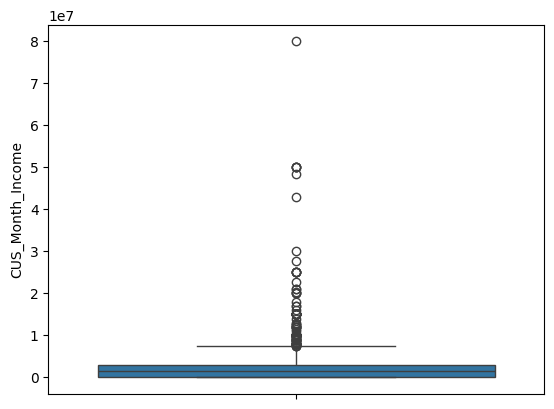

In [ ]:
sns.boxplot(df.CUS_Month_Income)

<Axes: xlabel='CUS_Month_Income', ylabel='Density'>

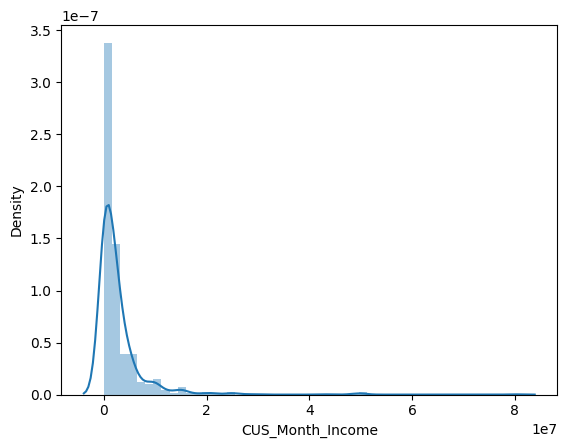

In [ ]:
sns.distplot(df.CUS_Month_Income)

**looking at the highest monthly income of a customer**

In [ ]:
print('Longest 5 Customer monthly income: \n {} '.format(df['CUS_Month_Income'].nlargest(5)))

Longest 5 Customer monthly income: 
 1210    80000000.0
423     50000000.0
425     50000000.0
555     50000000.0
1104    50000000.0
Name: CUS_Month_Income, dtype: float64 


**Treating the outliers**

In banking data, extreme values in monthly income aren’t always errors.
For example, some customers may have very high monthly inflows due to business accounts, one-off transactions, or HNIs (High Net-worth Individuals).

**Handling the nan values of CUS_Monthly_Income**

In [ ]:
df['CUS_Month_Income'].fillna(df['CUS_Month_Income'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
CIF,0
CUS_DOB,0
AGE,0
CUS_Month_Income,0
CUS_Gender,2
CUS_Marital_Status,0
CUS_Customer_Since,0
YEARS_WITH_US,0
# total debit transactions for S1,0
# total debit transactions for S2,0


**Handling Gender Column**

**counts of unique values.**

In [ ]:
df["CUS_Gender"].value_counts()

,count
CUS_Gender,
MALE,741
FEMALE,506


In [ ]:
df['CUS_Gender'].fillna(df['CUS_Gender'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
CIF,0
CUS_DOB,0
AGE,0
CUS_Month_Income,0
CUS_Gender,0
CUS_Marital_Status,0
CUS_Customer_Since,0
YEARS_WITH_US,0
# total debit transactions for S1,0
# total debit transactions for S2,0


**Converting categorical feature to numerical feature**

In [ ]:
df["CUS_Gender"] = df["CUS_Gender"].map({'MALE':1,"FEMALE":0})


In [ ]:
df["CUS_Gender"]

,CUS_Gender
0,1
1,0
2,0
3,0
4,0
...,...
1244,1
1245,1
1246,1
1247,1


**Coverting  DOB to datetime format and set the customer year**

In [ ]:
df["CUS_DOB_Year"] = pd.to_datetime(df["CUS_DOB"]).dt.year

In [ ]:
print(df)

         CIF              CUS_DOB  AGE  CUS_Month_Income  CUS_Gender CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  # total debit transactions for S1  # total debit transactions for S2  # total debit transactions for S3  total debit amount for S1  total debit amount for S2  total debit amount for S3  # total credit transactions for S1  # total credit transactions for S2  # total credit transactions for S3  total credit amount for S1  total credit amount for S2  total credit amount for S3  total debit amount  total debit transactions  total credit amount  total credit transactions  total transactions  CUS_Target   TAR_Desc  Status  CUS_DOB_Year
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64           1            MARRIED         1994-06-30             25                                277                                265                                345                 1459126.64                 1230543.08                 2068641.91                                  

**Converting TAR_Desc (categorical feature) to (numerical feature)**

In [ ]:
df.TAR_Desc.value_counts()

,count
TAR_Desc,
LOW,753
MIDLE,406
EXECUTIVE,59
PLATINUM,31


In [ ]:
df['TAR_Desc'] = df['TAR_Desc'].replace({'MIDLE': 'MIDDLE'})

In [ ]:
tar_desc_mapping = {'LOW': 1, 'MIDDLE': 2, 'EXECUTIVE': 3, 'PLATINUM': 4}
df['TAR_Desc_encoded'] = df['TAR_Desc'].map(tar_desc_mapping)

In [ ]:
df['TAR_Desc_encoded']

,TAR_Desc_encoded
0,3
1,1
2,2
3,1
4,1
...,...
1244,1
1245,2
1246,2
1247,2


**Converting Status (categorical feature) to (numerical feature)**


In [ ]:
df.Status.value_counts()

,count
Status,
ACTIVE,1022
CHURN,227


In [ ]:
df["Status"] = df["Status"].map({'ACTIVE':1,'CHURN':0})

In [ ]:
df["Status"]

,Status
0,1
1,1
2,1
3,1
4,1
...,...
1244,0
1245,1
1246,1
1247,1


In [ ]:
df['AGE']

,AGE
0,49
1,46
2,53
3,15
4,48
...,...
1244,68
1245,35
1246,34
1247,69


In [ ]:
df['AGE'].max()

119

In [ ]:
df['AGE'].min()

14

In [ ]:
df['AGE'].describe()

,AGE
count,1249.000000
mean,46.746998
std,12.315109
min,14.000000
25%,39.000000
50%,46.000000
75%,55.000000
max,119.000000


In [ ]:
print(df[df['AGE'] > 100])

        CIF              CUS_DOB  AGE  CUS_Month_Income  CUS_Gender CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  # total debit transactions for S1  # total debit transactions for S2  # total debit transactions for S3  total debit amount for S1  total debit amount for S2  total debit amount for S3  # total credit transactions for S1  # total credit transactions for S2  # total credit transactions for S3  total credit amount for S1  total credit amount for S2  total credit amount for S3  total debit amount  total debit transactions  total credit amount  total credit transactions  total transactions  CUS_Target TAR_Desc  Status  CUS_DOB_Year  TAR_Desc_encoded
184  XXXXXX  Jan  1 1900 12:00AM  119         1500000.0           1            MARRIED         1998-01-20             21                                  4                                  4                                  1                     2899.6                    15000.0                      749.7                    

In [ ]:
df = df[df['AGE'] <= 100]

**Graph between Martial status and status**


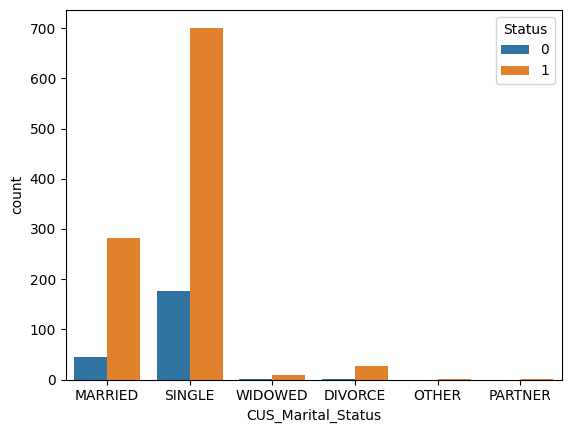

In [ ]:
sns.countplot(data=df, x='CUS_Marital_Status', hue='Status')
plt.show()

Single customers have the highest churn rate and count — they are significantly more likely to leave the bank.

Married customers show a comparatively lower churn rate.

Other categories (Widowed, Divorced, Other, Partner) have very few customers and contribute minimally to churn.

**Inference:**

Marital status is an important predictor of churn.

**Converting CUS_Martial_Status (categorical feature) to (numerical feature)**
1. Will use one hot encoding in this
2. One hot encoding is applied to nominal categorical feature.
3. In this it generally lead to the multicollinearity (it should not be their cause it make our important feature dependent on each other with somekind of mathematical function between them)
4. To overcome this trap (dummy data trap) we basically drop one column (n-1)

In [ ]:
df['CUS_Marital_Status'].value_counts()

,count
CUS_Marital_Status,
SINGLE,878
MARRIED,327
DIVORCE,30
WIDOWED,10
OTHER,1
PARTNER,1


In [ ]:
df['CUS_Marital_Status'] = df['CUS_Marital_Status'].replace(
    ['OTHER', 'PARTNER'], 'OTHER'
)

In [ ]:
marital_dummies = pd.get_dummies(df['CUS_Marital_Status'], prefix='Marital', drop_first=True)
df = pd.concat([df, marital_dummies], axis=1)

In [ ]:
df.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CUS_DOB_Year', 'TAR_Desc_encoded',
       'Marital_MARRIED', 'Marital_OTHER', 'Marital_SINGLE',
       'Marital_WIDOWED'],
      dtype='object')

<Figure size 2400x1600 with 0 Axes>

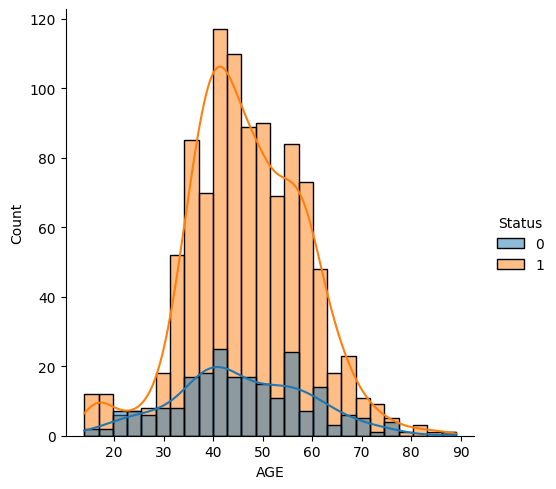

In [ ]:
plt.figure(figsize=(24,16))
sns.displot(data=df, x="AGE", hue="Status",  kde=True, )
plt.show()

**Explanation**
Blue curve (Status = 0) → Active customers.

Orange curve (Status = 1) → Churned customers.

The x-axis shows Age (20–120 years), y-axis shows the number of customers.

Both groups are right-skewed

**Key Observations:**
Churned customers (orange):

Peak around 40–50 years.

Majority fall between 35–60 years.

Active customers (blue):

More evenly distributed, with a relatively stronger presence in the younger (<35) and older (>60) age brackets.

A few customers have ages >100, likely outliers or incorrect DOB entries.

Age is a significant predictor for churn.

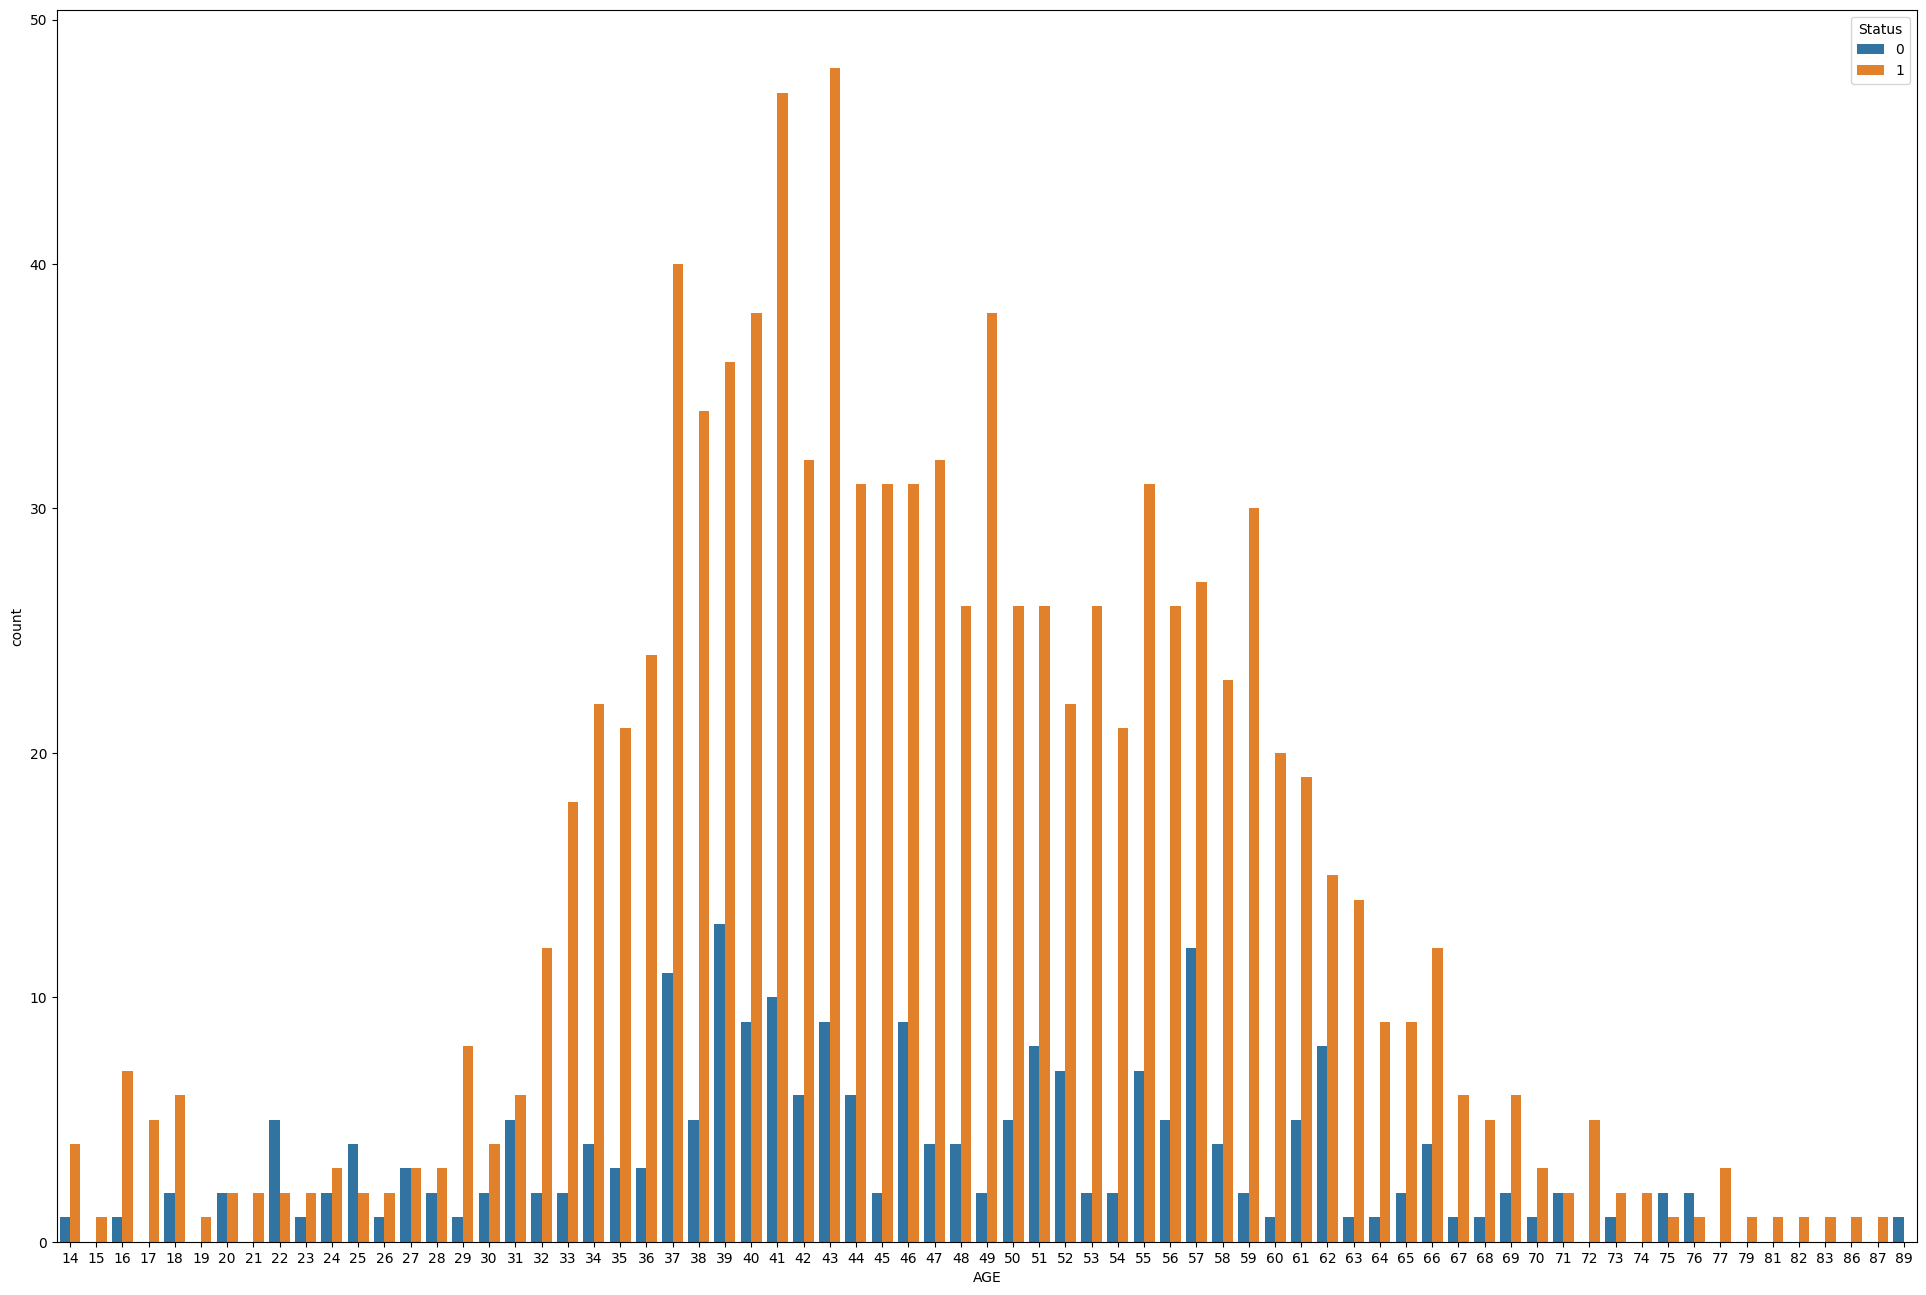

In [ ]:
plt.figure(figsize=(24,16))
sns.countplot(data=df, x="AGE", hue="Status", )
plt.show()

In [ ]:
df['CUS_Target'].value_counts()

,count
CUS_Target,
2223,745
2222,383
2212,53
2211,25
2232,13
2235,10
2230,6
2231,3
2224,3


In [ ]:
pd.crosstab(df['CUS_Target'], df['Status'], normalize='index')

Status,0,1
CUS_Target,,
2211,0.120000,0.880000
2212,0.018868,0.981132
2222,0.140992,0.859008
2223,0.221477,0.778523
2224,0.000000,1.000000
2230,0.166667,0.833333
2231,0.000000,1.000000
2232,0.000000,1.000000
2233,1.000000,0.000000


Many CUS_Target values have 100% churn.
Example:

For CUS_Target = 2224, all customers churned (Status = 1 for 100% of them).

For CUS_Target = 2233, all customers stayed (Status = 0 for 100% of them).

This means if the model sees CUS_Target, it can perfectly predict churn for some customers without learning from their real behavior — a clear sign of **data leakage.**

**Dropping irrelevant features**

In [ ]:
df.drop(["CIF", "CUS_DOB","TAR_Desc","CUS_DOB_Year","CUS_Customer_Since","CUS_Marital_Status","CUS_Target" ], axis=1, inplace=True)

In [ ]:
df.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'Status',
       'TAR_Desc_encoded', 'Marital_MARRIED', 'Marital_OTHER',
       'Marital_SINGLE', 'Marital_WIDOWED'],
      dtype='object')

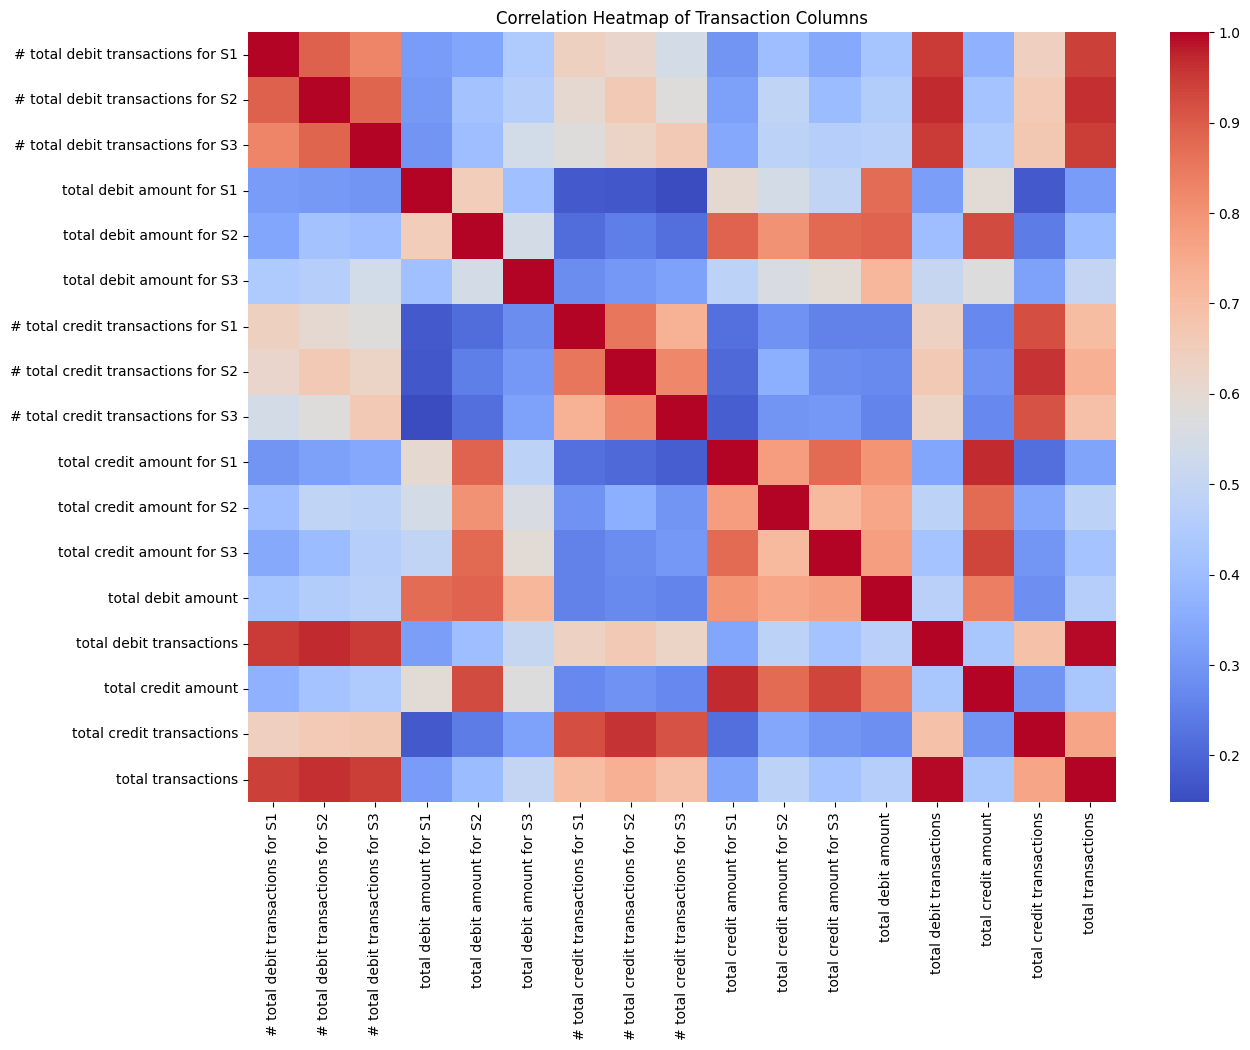

Highly correlated pairs (r > 0.9):
total transactions                  total debit transactions              0.994370
total debit transactions            total transactions                    0.994370
                                    # total debit transactions for S2     0.968985
# total debit transactions for S2   total debit transactions              0.968985
total credit amount for S1          total credit amount                   0.966916
total credit amount                 total credit amount for S1            0.966916
total transactions                  # total debit transactions for S2     0.962753
# total debit transactions for S2   total transactions                    0.962753
# total credit transactions for S2  total credit transactions             0.957244
total credit transactions           # total credit transactions for S2    0.957244
# total debit transactions for S3   total debit transactions              0.948941
total debit transactions            # total debit tr

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only transaction-related columns
transaction_cols = [
    '# total debit transactions for S1', '# total debit transactions for S2',
    '# total debit transactions for S3', 'total debit amount for S1',
    'total debit amount for S2', 'total debit amount for S3',
    '# total credit transactions for S1', '# total credit transactions for S2',
    '# total credit transactions for S3', 'total credit amount for S1',
    'total credit amount for S2', 'total credit amount for S3',
    'total debit amount', 'total debit transactions',
    'total credit amount', 'total credit transactions',
    'total transactions'
]

# Compute correlation matrix
corr_matrix = df[transaction_cols].corr()

# Visualize heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Transaction Columns")
plt.show()

# Optional: Find pairs with correlation > 0.9 (highly correlated)
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # exclude self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9]
print("Highly correlated pairs (r > 0.9):")
print(high_corr_pairs)


**Interpretation:**

total transactions ≈ total debit transactions (r ≈ 0.99) → almost the same info.

total debit transactions ≈ sum of # total debit transactions for S1/S2/S3 (r > 0.94).

total credit amount ≈ total credit amount for S1 and total credit amount for S3 (r > 0.93).

total credit transactions ≈ # total credit transactions for S1/S2/S3 (r > 0.91).

Prefer aggregates (total debit amount, total credit amount, total debit transactions, total credit transactions, total transactions) because they give a full view.

Drop branch-level columns (S1, S2, S3 transactions and amounts) since they’re highly correlated and don’t add much predictive power unless branch behavior is important.

In [ ]:
# Columns to drop
drop_cols = [
    # Drop branch-level transaction columns (highly correlated with aggregates)
    '# total debit transactions for S1',
    '# total debit transactions for S2',
    '# total debit transactions for S3',
    'total debit amount for S1',
    'total debit amount for S2',
    'total debit amount for S3',
    '# total credit transactions for S1',
    '# total credit transactions for S2',
    '# total credit transactions for S3',
    'total credit amount for S1',
    'total credit amount for S2',
    'total credit amount for S3'
]

# Drop them from dataframe
df = df.drop(columns=drop_cols, errors='ignore')

print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'YEARS_WITH_US',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'Status',
       'TAR_Desc_encoded', 'Marital_MARRIED', 'Marital_OTHER',
       'Marital_SINGLE', 'Marital_WIDOWED'],
      dtype='object')


In [ ]:
df.shape

(1247, 15)

**Checking dtypes of each dataset**

In [ ]:
df.dtypes

,0
AGE,int64
CUS_Month_Income,float64
CUS_Gender,int64
YEARS_WITH_US,int64
total debit amount,float64
total debit transactions,int64
total credit amount,float64
total credit transactions,int64
total transactions,int64
Status,int64


In [ ]:
df[['Marital_MARRIED', 'Marital_OTHER','Marital_SINGLE','Marital_WIDOWED','CUS_Gender']] = df[['Marital_MARRIED', 'Marital_OTHER','Marital_SINGLE','Marital_WIDOWED','CUS_Gender']].astype(int)

In [ ]:
df.dtypes

,0
AGE,int64
CUS_Month_Income,float64
CUS_Gender,int64
YEARS_WITH_US,int64
total debit amount,float64
total debit transactions,int64
total credit amount,float64
total credit transactions,int64
total transactions,int64
Status,int64


<Axes: xlabel='Status', ylabel='count'>

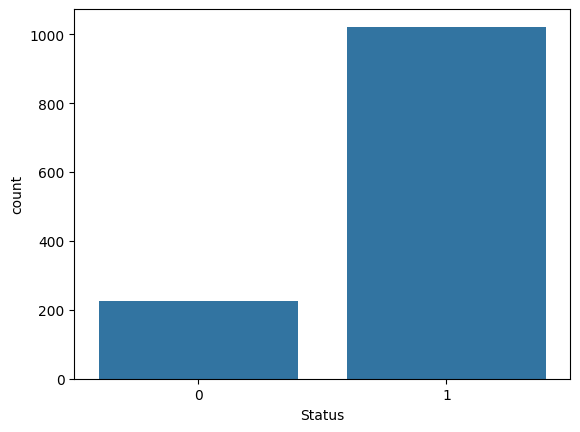

In [ ]:
sns.countplot(data=df, x="Status")

In [ ]:
df['Status'].value_counts()

,count
Status,
1,1022
0,225


**This plot shows that our dataset is imbalanced**


**Out of 1247 we have active as 1022 and churn as 225 it's lead to **
1. Model will be biased to majority
2. Dataset is inbalanced

In [ ]:
df.to_excel('ml_ready_dataset.xlsx', index=False)

**Creating Independent and Dependent features**

In [ ]:
X = df.drop(["Status"], axis=1) # Independent Features
y = df["Status"] # Dependent Features

In [ ]:
X.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'YEARS_WITH_US',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'TAR_Desc_encoded',
       'Marital_MARRIED', 'Marital_OTHER', 'Marital_SINGLE',
       'Marital_WIDOWED'],
      dtype='object')

In [ ]:
X.dtypes

,0
AGE,int64
CUS_Month_Income,float64
CUS_Gender,int64
YEARS_WITH_US,int64
total debit amount,float64
total debit transactions,int64
total credit amount,float64
total credit transactions,int64
total transactions,int64
TAR_Desc_encoded,int64


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = ['AGE', 'CUS_Month_Income', 'YEARS_WITH_US',
                'total debit amount', 'total debit transactions',
                'total credit amount', 'total credit transactions',
                'total transactions']

scaler = StandardScaler()
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
X_train

,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,TAR_Desc_encoded,Marital_MARRIED,Marital_OTHER,Marital_SINGLE,Marital_WIDOWED
1133,-0.489197,-0.315406,1,-0.040828,-0.034301,1.294400,-0.083286,0.417825,1.218298,1,0,0,1,0
969,0.872938,-0.497351,1,-0.040828,0.056593,0.147259,0.076251,-0.028571,0.128313,2,1,0,0,0
1097,-0.744597,-0.041804,1,-0.040828,-0.272190,-0.575482,-0.228109,-0.586567,-0.595829,1,0,0,1,0
833,0.787805,1.326204,1,-0.040828,0.176069,-0.525058,-0.028804,-0.558667,-0.546799,2,0,0,1,0
729,-0.659464,-0.230285,1,-0.040828,-0.068777,1.512903,-0.107403,0.278326,1.395562,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.362137,-0.497789,1,-0.040828,0.296611,3.420603,0.187101,0.947921,3.198375,1,0,0,1,0
311,-0.914864,-0.497479,1,-0.040828,-0.158185,-0.264535,-0.115887,0.027228,-0.233758,2,0,0,1,0
1119,-0.063530,0.049396,1,-0.040828,-0.215315,-0.453624,-0.175984,-0.084371,-0.418565,1,0,0,1,0
599,-0.233797,-0.278926,1,-0.040828,-0.150607,-0.037628,-0.101258,-0.168070,-0.056494,2,0,0,1,0


In [ ]:
#X['CUS_Month_Income'] = np.log1p(X['CUS_Month_Income'])

**Conversation of imbalance dataset to balanced dataset by using upsampling.
Not using downsampling as it has its own disadvantages of information loss**

oversampling - we take the minority class sample's and matchup it with the majority class sample
1. Random Oversampling
2. SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
# ========== Resampling ==========
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote = pd.DataFrame(X_smote, columns=X_train.columns)

smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
X_smoteenn = pd.DataFrame(X_smoteenn, columns=X_train.columns)

# Align test set
X_test_aligned = X_test[X_smote.columns]

# ========== Define models ==========
models = {
    "LR + SMOTE": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "DT + SMOTE": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "RF + SMOTE": RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    "XGB + SMOTE": XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
                                 eval_metric='logloss', use_label_encoder=False,
                                 n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42),
    "CatBoost + SMOTE": CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42),
    "LGBM + SMOTE": LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42),

    "LR + SMOTEENN": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "DT + SMOTEENN": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "RF + SMOTEENN": RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    "XGB + SMOTEENN": XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
                                    eval_metric='logloss', use_label_encoder=False,
                                    n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42),
    "CatBoost + SMOTEENN": CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42),
    "LGBM + SMOTEENN": LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42),
}

# Train models
for name, model in models.items():
    if "SMOTEENN" in name:
        model.fit(X_smoteenn, y_smoteenn)
    else:
        model.fit(X_smote, y_smote)

# Evaluate models and collect metrics
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_aligned)
    y_prob = model.predict_proba(X_test_aligned)[:, 1]
    results.append({
        "Model": name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# Create a summary table
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 817, number of negative: 817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 523, number of negative: 650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1830
[LightGBM] [Inf

Top Performers (by ROC-AUC & F1-score)

**CatBoost + SMOTEENN**

ROC-AUC: 0.8607 (best overall)

F1: 0.8189

Strong at balancing precision and recall, good at handling imbalanced data.

**Random Forest + SMOTEENN**

ROC-AUC: 0.8488

F1: 0.8156

Close competitor to CatBoost, stable on noisy datasets.

In [ ]:
import joblib
import os

# Create a folder for saved models
os.makedirs("saved_models", exist_ok=True)

# Save CatBoost + SMOTEENN
catboost_model = models["CatBoost + SMOTEENN"]
joblib.dump(catboost_model, "saved_models/catboost_smoteenn.pkl")

# Save RandomForest + SMOTEENN
rf_model = models["RF + SMOTEENN"]
joblib.dump(rf_model, "saved_models/rf_smoteenn.pkl")

print("Top models saved successfully!")


**Step - 2 Recomendation Engine**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/stage2_churn_type_dataset.csv")


In [ ]:
df.head()

,CustomerID,Age,Income,Account_Tenure,Transactions_Per_Month,Digital_Usage,Avg_Balance,Credit_Score,Branch_Visits,Complaints_Filed,Products_Held,Churn_Type
0,CUST0001,31,296867,2,29,20,5860,721,1,0,1,Fee Sensitive
1,CUST0002,47,318266,5,38,30,26962,749,3,1,2,Fee Sensitive
2,CUST0003,48,344027,4,35,10,7433,707,2,0,1,Fee Sensitive
3,CUST0004,41,388042,3,24,37,30658,664,2,1,2,Fee Sensitive
4,CUST0005,47,216803,1,39,12,36551,700,3,0,1,Fee Sensitive


In [ ]:
df['Churn_Type'].value_counts()

,count
Churn_Type,
Fee Sensitive,34
Service Dissatisfied,34
Low Engagement,33
Competitor-Driven,33
Credit-Seeking,33
Digital Enthusiast,33


In [ ]:
# Features & target
X = df.drop(["Churn_Type","CustomerID"], axis=1)
y = df["Churn_Type"]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts to 0,1,2,3,4,5

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# XGBoost model
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        num_class=len(le.classes_),
        eval_metric='mlogloss',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_))

Classification Report:
                       precision    recall  f1-score   support

   Competitor-Driven       1.00      1.00      1.00         7
      Credit-Seeking       1.00      1.00      1.00         6
  Digital Enthusiast       1.00      1.00      1.00         7
       Fee Sensitive       1.00      1.00      1.00         7
      Low Engagement       1.00      1.00      1.00         6
Service Dissatisfied       1.00      1.00      1.00         7

            accuracy                           1.00        40
           macro avg       1.00      1.00      1.00        40
        weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[7 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 7]]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-validation Accuracy: 100.00%


The dataset is very simple or highly separable — patterns for each churn type are too distinct.

Overfitting — both models are memorizing the data because the dataset is small (200 rows, 6 classes).

In [ ]:
import joblib

# Save the trained model
joblib.dump(xgb_clf, "stage2_churn_type_xgb_model.pkl")
print("Model saved successfully as stage2_churn_type_xgb_model.pkl")


Model saved successfully as stage2_churn_type_xgb_model.pkl


In [ ]:
# Load the model
xgb_clf_loaded = joblib.load("stage2_churn_type_xgb_model.pkl")

# Use for prediction just like before
# y_pred = xgb_clf_loaded.predict(new_data)


In [ ]:
joblib.dump(le, "stage2_label_encoder.pkl")


['stage2_label_encoder.pkl']

In [ ]:
import pandas as pd
import joblib

# Load saved model and label encoder
xgb_clf = joblib.load("stage2_churn_type_xgb_model.pkl")
le = joblib.load("stage2_label_encoder.pkl")

def get_customer_input():
    """Collect customer details interactively and return as a dictionary."""
    data = {
        "Age": int(input("Enter the Age of the Customer: ")),
        "Income": int(input("Enter the Income of the Customer: ")),
        "Account_Tenure": int(input("Enter the Account_Tenure of the Customer: ")),
        "Transactions_Per_Month": int(input("Enter the Transactions_Per_Month of the Customer: ")),
        "Digital_Usage": int(input("Enter the Digital_Usage of the Customer: ")),
        "Avg_Balance": int(input("Enter the Avg_Balance of the Customer: ")),
        "Credit_Score": int(input("Enter the Credit_Score of the Customer: ")),
        "Branch_Visits": int(input("Enter the Branch_Visits of the Customer: ")),
        "Complaints_Filed": int(input("Enter the Complaints_Filed of the Customer: ")),
        "Products_Held": int(input("Enter the Products_Held of the Customer: "))
    }
    return data

def predict_churn_type(model, label_encoder, customer_data):
    """Predict churn type and return the top churn type with its probability."""
    new_data = pd.DataFrame([customer_data])
    pred_encoded = model.predict(new_data)
    pred_label = label_encoder.inverse_transform(pred_encoded)[0]
    pred_proba = model.predict_proba(new_data)[0]
    proba_dict = dict(zip(label_encoder.classes_, pred_proba))

    print(f"\nPredicted Churn Type: {pred_label}")
    print("Probability Scores:")
    for churn_type, prob in proba_dict.items():
        print(f"  {churn_type}: {prob:.2f}")

    # Get top churn type and probability
    top_churn_type = max(proba_dict, key=proba_dict.get)
    top_probability = round(float(proba_dict[top_churn_type]), 2)

    return top_churn_type, top_probability

# Usage:
customer_info = get_customer_input()
top_type, top_prob = predict_churn_type(xgb_clf, le, customer_info)
print(f"\nTop predicted churn type: {top_type} ({top_prob})")


KeyboardInterrupt: Interrupted by user

Loading Dummy Dataset

**Step 2.5**

In [ ]:
import pandas as pd
import numpy as np

**Creating a Dummy Dataset for NBA**

In [ ]:
churn_types = list({
    "Competitor-Driven": ["Offer better interest rates", "Provide loyalty rewards"],
    "Credit-Seeking": ["Pre-approved credit line", "Low-interest personal loan"],
    "Digital Enthusiast": ["Exclusive digital rewards", "Provide loyalty rewards"],
    "Fee Sensitive": ["Waive fees on key services", "Offer better interest rates"],
    "Low Engagement": ["Personalized engagement campaign", "Exclusive digital rewards"],
    "Service Dissatisfied": ["Priority support callback", "Personalized engagement campaign"]
}.keys())

action_map = {
    "Competitor-Driven": ["Offer better interest rates", "Provide loyalty rewards"],
    "Credit-Seeking": ["Pre-approved credit line", "Low-interest personal loan"],
    "Digital Enthusiast": ["Exclusive digital rewards", "Provide loyalty rewards"],
    "Fee Sensitive": ["Waive fees on key services", "Offer better interest rates"],
    "Low Engagement": ["Personalized engagement campaign", "Exclusive digital rewards"],
    "Service Dissatisfied": ["Priority support callback", "Personalized engagement campaign"]
}

def generate_rows(seed, start_index=0):
    np.random.seed(seed)
    rows = []
    n_per_type = 2000 // len(churn_types)

    for churn in churn_types:
        for _ in range(n_per_type):
            age = np.random.randint(21, 60)
            income = np.random.choice([25000, 40000, 60000, 100000, 150000, 250000], p=[0.2, 0.25, 0.2, 0.2, 0.1, 0.05])
            tenure = np.random.randint(1, 16)
            transactions = np.random.randint(5, 40)
            digital_usage = np.random.randint(2, 10)
            avg_balance = np.random.choice([10000, 25000, 50000, 100000, 300000, 700000], p=[0.2, 0.3, 0.2, 0.15, 0.1, 0.05])
            credit_score = np.random.randint(650, 850)
            branch_visits = np.random.randint(1, 6)
            complaints = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])
            products = np.random.randint(1, 5)

            action = np.random.choice(action_map[churn])
            success = np.random.choice([1, 0], p=[0.7, 0.3])

            rows.append([
                f"CUST{start_index + len(rows) + 1:05d}", age, income, tenure, transactions,
                digital_usage, avg_balance, credit_score, branch_visits,
                complaints, products, churn, action, success
            ])

    return rows

# Generate 2000 rows per seed and concatenate
all_rows = []
seeds = [42, 101, 7, 77, 123]
for i, seed in enumerate(seeds):
    all_rows.extend(generate_rows(seed, start_index=i * 2000))

columns = ["CustomerID", "Age", "Income", "Account_Tenure", "Transactions_Per_Month",
           "Digital_Usage", "Avg_Balance", "Credit_Score", "Branch_Visits",
           "Complaints_Filed", "Products_Held", "Churn_Type", "Recommended_Action", "Action_Success"]

df = pd.DataFrame(all_rows, columns=columns)
df.to_csv("Stage2_5_Balanced_Recommendation_Dataset.csv", index=False)

print("Final dataset created:", df.shape)
df.head()


In [ ]:
df = pd.read_csv("/content/Stage2_5_Balanced_Recommendation_Dataset.csv")

In [ ]:
df

,CustomerID,Age,Income,Account_Tenure,Transactions_Per_Month,Digital_Usage,Avg_Balance,Credit_Score,Branch_Visits,Complaints_Filed,Products_Held,Churn_Type,Recommended_Action,Action_Success
0,CUST00001,59,100000,15,12,6,50000,771,3,0,3,Competitor-Driven,Provide loyalty rewards,1
1,CUST00002,44,100000,5,6,9,100000,687,2,0,1,Competitor-Driven,Offer better interest rates,1
2,CUST00003,42,25000,9,31,4,25000,837,3,0,4,Competitor-Driven,Provide loyalty rewards,1
3,CUST00004,57,60000,5,13,8,10000,738,4,0,2,Competitor-Driven,Offer better interest rates,1
4,CUST00005,22,100000,15,11,5,25000,824,3,2,4,Competitor-Driven,Provide loyalty rewards,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,CUST09994,27,40000,6,8,7,50000,798,5,0,4,Service Dissatisfied,Personalized engagement campaign,1
9986,CUST09995,38,250000,13,35,3,25000,754,1,0,4,Service Dissatisfied,Priority support callback,1
9987,CUST09996,53,40000,2,21,3,100000,717,1,0,4,Service Dissatisfied,Personalized engagement campaign,1
9988,CUST09997,23,100000,11,31,7,50000,754,3,1,1,Service Dissatisfied,Personalized engagement campaign,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode Recommended_Action (target)
action_encoder = LabelEncoder()
df["Action_Label"] = action_encoder.fit_transform(df["Recommended_Action"])

# Features: exclude CustomerID, Recommended_Action, Action_Success, Action_Label
X = df.drop(columns=["CustomerID", "Recommended_Action", "Action_Success", "Action_Label"])
X = pd.get_dummies(X, columns=["Churn_Type"], drop_first=True)
y = df["Action_Label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=action_encoder.classes_))


Classification Report:
                                   precision    recall  f1-score   support

       Exclusive digital rewards       0.48      0.50      0.49       326
      Low-interest personal loan       0.46      0.50      0.48       165
     Offer better interest rates       0.50      0.41      0.45       332
Personalized engagement campaign       0.55      0.46      0.50       328
        Pre-approved credit line       0.52      0.48      0.50       186
       Priority support callback       0.58      0.68      0.63       161
         Provide loyalty rewards       0.51      0.55      0.53       336
      Waive fees on key services       0.50      0.65      0.56       164

                        accuracy                           0.51      1998
                       macro avg       0.51      0.53      0.52      1998
                    weighted avg       0.51      0.51      0.51      1998



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='f1_weighted',  # or 'accuracy', 'precision_macro', etc.
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.5135920831277622


In [ ]:
import numpy as np

def recommend_top_actions(model, encoder, new_data):
    # Prepare new data in same format as training
    new_data_encoded = pd.get_dummies(pd.DataFrame([new_data]), columns=["Churn_Type"])
    new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Predict probabilities for all actions
    proba = model.predict_proba(new_data_encoded)[0]

    # Get top 2 actions
    top_indices = np.argsort(proba)[-2:][::-1]
    top_actions = encoder.inverse_transform(top_indices)
    top_probs = proba[top_indices]

    return list(zip(top_actions, top_probs))


In [ ]:
# Pick a sample customer
sample_customer = df.iloc[0].drop(["CustomerID", "Recommended_Action", "Action_Success", "Action_Label"]).to_dict()

top_2 = recommend_top_actions(rf_model, action_encoder, sample_customer)
print("\nTop 2 recommended actions:")
for action, prob in top_2:
    print(f"{action}: {prob:.2f}")



Top 2 recommended actions:
Offer better interest rates: 0.47
Provide loyalty rewards: 0.40


**saving the model**

In [ ]:
import joblib
# Save the best model
joblib.dump(grid_search.best_estimator_, "nba_rf_model.pkl")
# Assuming your label encoder is named action_encoder
joblib.dump(action_encoder, "nba_action_label_encoder.pkl")


['nba_action_label_encoder.pkl']

In [ ]:
import pandas as pd
import joblib

# Load model and label encoder
rf_model = joblib.load("nba_rf_model.pkl")
action_encoder = joblib.load("nba_action_label_encoder.pkl")

# Load the feature columns used during training (should be saved after training)
X_columns = joblib.load("nba_X_columns.pkl")

def get_customer_input():
    """Collect customer features from user input."""
    data = {
        "Age": int(input("Enter Age: ")),
        "Income": float(input("Enter Income: ")),
        "Account_Tenure": int(input("Enter Account Tenure: ")),
        "Transactions_Per_Month": int(input("Enter Transactions Per Month: ")),
        "Digital_Usage": float(input("Enter Digital Usage (e.g., 0.85): ")),
        "Avg_Balance": float(input("Enter Average Balance: ")),
        "Credit_Score": float(input("Enter Credit Score: ")),
        "Branch_Visits": int(input("Enter Branch Visits per month: ")),
        "Complaints_Filed": int(input("Enter Complaints Filed: ")),
        "Products_Held": int(input("Enter Products Held: ")),
        "Churn_Type": input("Enter Churn Type (e.g., Pricing, Service Issue): ")
    }
    return data

def predict_next_best_action(model, label_encoder, X_columns, input_data):
    """Predict recommended action using NBA model."""
    df = pd.DataFrame([input_data])

    # One-hot encode 'Churn_Type'
    df = pd.get_dummies(df, columns=["Churn_Type"], drop_first=True)

    # Ensure all columns match training
    for col in X_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[X_columns]  # Reorder to match training input

    # Predict
    pred_label = model.predict(df)[0]
    pred_proba = model.predict_proba(df)[0]

    # Decode label
    recommended_action = label_encoder.inverse_transform([pred_label])[0]

    # Print output
    print(f"\nRecommended Action: {recommended_action}")
    print("Confidence Scores:")
    for action, prob in zip(label_encoder.classes_, pred_proba):
        print(f"  {action}: {prob:.2f}")

    # Return top action and its probability
    top_action = label_encoder.inverse_transform([pred_proba.argmax()])[0]
    top_prob = round(pred_proba.max(), 2)

    return top_action, top_prob

# Example usage

customer_info = get_customer_input()
top_action, top_confidence = predict_next_best_action(rf_model, action_encoder, X_columns, customer_info)
print(f"\nTop Predicted Action: {top_action} (Confidence: {top_confidence})")


FileNotFoundError: [Errno 2] No such file or directory: 'nba_rf_model.pkl'